In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pylab as plt

In [4]:
df = pd.read_csv(r'D:\0_sea_ice_challenge\processing\DRIFT_DATA_TRAIN.csv')
print(df.columns)
df_training = df[:]

Index(['year', 'month', 'day', 'doy', 'x_EASE', 'y_EASE', 'u_buoy', 'v_buoy',
       'id_buoy', 'u_ERA5', 'v_ERA5', 'sic_CDR', 'h_cs2smos', 'h_piomas',
       'd2c'],
      dtype='object')


In [5]:
var=df.copy()
var.head()

,year,month,day,doy,x_EASE,y_EASE,u_buoy,v_buoy,id_buoy,u_ERA5,v_ERA5,sic_CDR,h_cs2smos,h_piomas,d2c
0,1979,2,18,49,147.506958,138.582672,-0.797554,1.114740,1906,-6.704156,-0.321260,0.990195,NaN,3.189743,522.523298
1,1979,2,18,49,146.834778,120.509880,0.643200,0.368754,1913,-6.818630,-0.674205,0.966372,NaN,2.484009,412.767669
2,1979,2,18,49,130.993561,129.623672,-1.162420,0.243717,1914,-8.825469,1.123955,0.996022,NaN,2.474106,362.547379
3,1979,2,18,49,147.524719,157.382492,0.919766,0.025784,1918,-1.079951,-1.035410,0.982681,NaN,3.740522,381.025629
4,1979,2,19,50,147.470963,138.599823,0.380940,1.243485,1906,-2.169171,2.537787,0.990302,NaN,3.188522,521.535334


In [6]:
var.dtypes

year           int64
month          int64
day            int64
doy            int64
x_EASE       float64
y_EASE       float64
u_buoy       float64
v_buoy       float64
id_buoy        int64
u_ERA5       float64
v_ERA5       float64
sic_CDR      float64
h_cs2smos    float64
h_piomas     float64
d2c          float64
dtype: object

In [9]:
var = var.sort_values(['year', 'month', 'day'], ascending=[True,True, True])

In [10]:
a=pd.to_datetime(var[['year', 'month', 'day']])
a

0        1979-02-18
1        1979-02-18
2        1979-02-18
3        1979-02-18
4        1979-02-19
            ...    
339473   2019-12-30
339474   2019-12-30
339475   2019-12-30
339476   2019-12-30
339477   2019-12-30
Length: 339478, dtype: datetime64[ns]

In [15]:
b = a.copy()

In [17]:
b=list(b)

In [26]:
c=[b[0]]

In [30]:
len(c+b)

339479

In [32]:
d=c+b

In [34]:
d

[Timestamp('1979-02-18 00:00:00'),
 Timestamp('1979-02-18 00:00:00'),
 Timestamp('1979-02-18 00:00:00'),
 Timestamp('1979-02-18 00:00:00'),
 Timestamp('1979-02-18 00:00:00'),
 Timestamp('1979-02-19 00:00:00'),
 Timestamp('1979-02-19 00:00:00'),
 Timestamp('1979-02-19 00:00:00'),
 Timestamp('1979-02-19 00:00:00'),
 Timestamp('1979-02-19 00:00:00'),
 Timestamp('1979-02-20 00:00:00'),
 Timestamp('1979-02-20 00:00:00'),
 Timestamp('1979-02-20 00:00:00'),
 Timestamp('1979-02-20 00:00:00'),
 Timestamp('1979-02-20 00:00:00'),
 Timestamp('1979-02-20 00:00:00'),
 Timestamp('1979-02-20 00:00:00'),
 Timestamp('1979-02-21 00:00:00'),
 Timestamp('1979-02-21 00:00:00'),
 Timestamp('1979-02-21 00:00:00'),
 Timestamp('1979-02-21 00:00:00'),
 Timestamp('1979-02-21 00:00:00'),
 Timestamp('1979-02-21 00:00:00'),
 Timestamp('1979-02-22 00:00:00'),
 Timestamp('1979-02-22 00:00:00'),
 Timestamp('1979-02-22 00:00:00'),
 Timestamp('1979-02-22 00:00:00'),
 Timestamp('1979-02-22 00:00:00'),
 Timestamp('1979-02-

In [35]:
d.pop()

Timestamp('2019-12-30 00:00:00')

In [36]:
len(d)

339478

In [38]:
b

[Timestamp('1979-02-18 00:00:00'),
 Timestamp('1979-02-18 00:00:00'),
 Timestamp('1979-02-18 00:00:00'),
 Timestamp('1979-02-18 00:00:00'),
 Timestamp('1979-02-19 00:00:00'),
 Timestamp('1979-02-19 00:00:00'),
 Timestamp('1979-02-19 00:00:00'),
 Timestamp('1979-02-19 00:00:00'),
 Timestamp('1979-02-19 00:00:00'),
 Timestamp('1979-02-20 00:00:00'),
 Timestamp('1979-02-20 00:00:00'),
 Timestamp('1979-02-20 00:00:00'),
 Timestamp('1979-02-20 00:00:00'),
 Timestamp('1979-02-20 00:00:00'),
 Timestamp('1979-02-20 00:00:00'),
 Timestamp('1979-02-20 00:00:00'),
 Timestamp('1979-02-21 00:00:00'),
 Timestamp('1979-02-21 00:00:00'),
 Timestamp('1979-02-21 00:00:00'),
 Timestamp('1979-02-21 00:00:00'),
 Timestamp('1979-02-21 00:00:00'),
 Timestamp('1979-02-21 00:00:00'),
 Timestamp('1979-02-22 00:00:00'),
 Timestamp('1979-02-22 00:00:00'),
 Timestamp('1979-02-22 00:00:00'),
 Timestamp('1979-02-22 00:00:00'),
 Timestamp('1979-02-22 00:00:00'),
 Timestamp('1979-02-22 00:00:00'),
 Timestamp('1979-02-

In [39]:
d

[Timestamp('1979-02-18 00:00:00'),
 Timestamp('1979-02-18 00:00:00'),
 Timestamp('1979-02-18 00:00:00'),
 Timestamp('1979-02-18 00:00:00'),
 Timestamp('1979-02-18 00:00:00'),
 Timestamp('1979-02-19 00:00:00'),
 Timestamp('1979-02-19 00:00:00'),
 Timestamp('1979-02-19 00:00:00'),
 Timestamp('1979-02-19 00:00:00'),
 Timestamp('1979-02-19 00:00:00'),
 Timestamp('1979-02-20 00:00:00'),
 Timestamp('1979-02-20 00:00:00'),
 Timestamp('1979-02-20 00:00:00'),
 Timestamp('1979-02-20 00:00:00'),
 Timestamp('1979-02-20 00:00:00'),
 Timestamp('1979-02-20 00:00:00'),
 Timestamp('1979-02-20 00:00:00'),
 Timestamp('1979-02-21 00:00:00'),
 Timestamp('1979-02-21 00:00:00'),
 Timestamp('1979-02-21 00:00:00'),
 Timestamp('1979-02-21 00:00:00'),
 Timestamp('1979-02-21 00:00:00'),
 Timestamp('1979-02-21 00:00:00'),
 Timestamp('1979-02-22 00:00:00'),
 Timestamp('1979-02-22 00:00:00'),
 Timestamp('1979-02-22 00:00:00'),
 Timestamp('1979-02-22 00:00:00'),
 Timestamp('1979-02-22 00:00:00'),
 Timestamp('1979-02-

In [43]:
np.array(b)-np.array(d)

array([Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'),
       Timedelta('0 days 00:00:00'), ..., Timedelta('0 days 00:00:00'),
       Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00')],
      dtype=object)

In [66]:
e = (np.array(b)-np.array(d))

In [67]:
e

array([Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'),
       Timedelta('0 days 00:00:00'), ..., Timedelta('0 days 00:00:00'),
       Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00')],
      dtype=object)

In [68]:
f=[]
for i in e:
    f.append(i.days)

In [69]:
f

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [76]:
var['f']=f

In [77]:
var['day_no']=var['f'].cumsum()

In [80]:
var.drop('f', axis=1, inplace=True)

In [81]:
var.head()

,year,month,day,doy,x_EASE,y_EASE,u_buoy,v_buoy,id_buoy,u_ERA5,v_ERA5,sic_CDR,h_cs2smos,h_piomas,d2c,day_no
0,1979,2,18,49,147.506958,138.582672,-0.797554,1.114740,1906,-6.704156,-0.321260,0.990195,NaN,3.189743,522.523298,0
1,1979,2,18,49,146.834778,120.509880,0.643200,0.368754,1913,-6.818630,-0.674205,0.966372,NaN,2.484009,412.767669,0
2,1979,2,18,49,130.993561,129.623672,-1.162420,0.243717,1914,-8.825469,1.123955,0.996022,NaN,2.474106,362.547379,0
3,1979,2,18,49,147.524719,157.382492,0.919766,0.025784,1918,-1.079951,-1.035410,0.982681,NaN,3.740522,381.025629,0
4,1979,2,19,50,147.470963,138.599823,0.380940,1.243485,1906,-2.169171,2.537787,0.990302,NaN,3.188522,521.535334,1


In [82]:
var.drop(['year','month','day','id_buoy','h_cs2smos'], axis=1, inplace=True)

In [92]:
var.head()

,doy,x_EASE,y_EASE,u_buoy,v_buoy,u_ERA5,v_ERA5,sic_CDR,h_piomas,d2c,day_no,val_mag,wind_val_mag,val_dir
0,49,147.506958,138.582672,-0.797554,1.114740,-6.704156,-0.321260,0.990195,3.189743,522.523298,0,1.370671,6.711849,
1,49,146.834778,120.509880,0.643200,0.368754,-6.818630,-0.674205,0.966372,2.484009,412.767669,0,0.741408,6.851881,
2,49,130.993561,129.623672,-1.162420,0.243717,-8.825469,1.123955,0.996022,2.474106,362.547379,0,1.187695,8.896751,
3,49,147.524719,157.382492,0.919766,0.025784,-1.079951,-1.035410,0.982681,3.740522,381.025629,0,0.920127,1.496117,
4,50,147.470963,138.599823,0.380940,1.243485,-2.169171,2.537787,0.990302,3.188522,521.535334,1,1.300527,3.338513,


In [86]:
var['val_mag'] = np.sqrt(var['u_buoy']**2 + var['v_buoy']**2 )

In [88]:
var['wind_val_mag'] = np.sqrt(var['u_ERA5']**2 + var['v_ERA5']**2 )

In [146]:
var['val_dir'] = np.where(var['v_buoy']!= 0, np.degrees(np.arctan(var['v_buoy']/var['u_buoy'])), 0)

In [148]:
var['wind_val_dir'] = np.where(var['v_ERA5']!= 0, np.degrees(np.arctan(var['v_ERA5']/var['u_ERA5'])), 0)

In [153]:
var.tail()

,day_no,doy,x_EASE,y_EASE,u_buoy,v_buoy,val_mag,val_dir,u_ERA5,v_ERA5,wind_val_mag,wind_val_dir,sic_CDR,h_piomas,d2c
339473,14925,364,193.232056,172.742004,-0.981225,-11.69840,11.739478,85.205433,-2.526544,-6.012877,6.522125,67.208396,1.000000,1.620020,702.312813
339474,14925,364,208.421234,142.049896,-7.247925,-5.28989,8.973035,36.123795,-4.615093,-0.381765,4.630856,4.728801,1.000000,1.288953,360.491321
339475,14925,364,145.264023,146.109741,-0.913761,2.18215,2.365742,-67.278820,1.940967,1.119087,2.240471,29.966106,1.000000,1.960349,393.799208
339476,14925,364,193.921402,174.408707,-0.101372,-11.79170,11.792136,89.507446,-2.468425,-5.363596,5.904344,65.287246,1.000000,1.610893,680.057567
339477,14925,364,100.407974,159.768845,0.000000,-0.00000,0.000000,0.000000,1.372457,7.310530,7.438245,79.367225,0.949975,1.339197,11.722729


In [150]:
var.columns

Index(['doy', 'x_EASE', 'y_EASE', 'u_buoy', 'v_buoy', 'u_ERA5', 'v_ERA5',
       'sic_CDR', 'h_piomas', 'd2c', 'day_no', 'val_mag', 'wind_val_mag',
       'val_dir', 'wind_val_dir'],
      dtype='object')

In [152]:
var = var[['day_no', 'doy', 'x_EASE', 'y_EASE', 'u_buoy', 'v_buoy', 'val_mag', 'val_dir', 'u_ERA5', 'v_ERA5',
         'wind_val_mag','wind_val_dir','sic_CDR', 'h_piomas', 'd2c']]

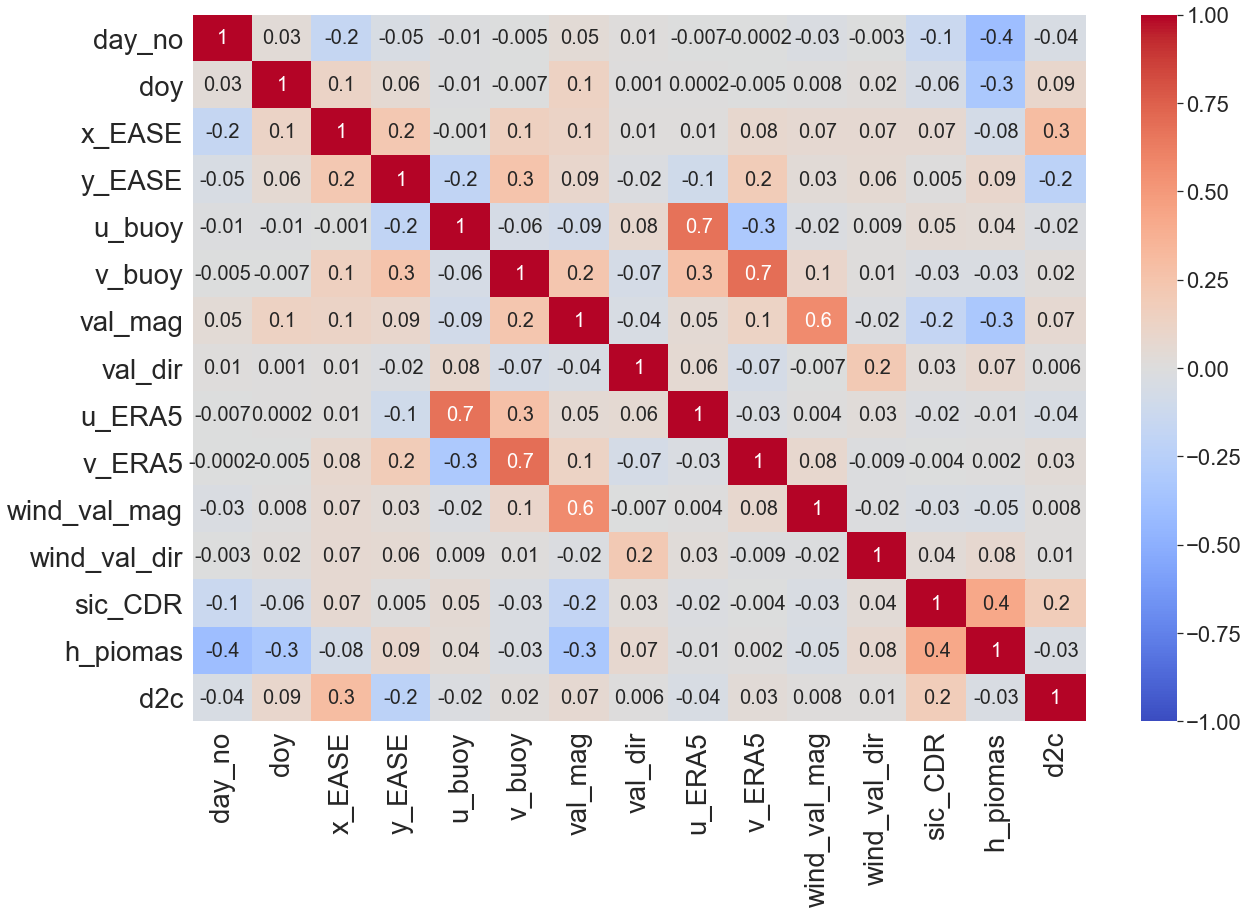

In [157]:
fig, ax = plt.subplots(figsize=(20,13))   
sns.set(font_scale=2)
sns.heatmap(var.corr(), ax=ax, annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',annot_kws={"size": 20})

In [172]:
var.head()

,day_no,doy,x_EASE,y_EASE,u_buoy,v_buoy,val_mag,val_dir,u_ERA5,v_ERA5,wind_val_mag,wind_val_dir,sic_CDR,h_piomas,d2c,C
0,0,49,147.506958,138.582672,-0.797554,1.114740,1.370671,-54.417723,-6.704156,-0.321260,6.711849,2.743485,0.990195,3.189743,522.523298,-1.000000
1,0,49,146.834778,120.509880,0.643200,0.368754,0.741408,29.826147,-6.818630,-0.674205,6.851881,5.646875,0.966372,2.484009,412.767669,29.826147
2,0,49,130.993561,129.623672,-1.162420,0.243717,1.187695,-11.841310,-8.825469,1.123955,8.896751,-7.257752,0.996022,2.474106,362.547379,-1.000000
3,0,49,147.524719,157.382492,0.919766,0.025784,0.920127,1.605796,-1.079951,-1.035410,1.496117,43.793757,0.982681,3.740522,381.025629,1.605796
4,1,50,147.470963,138.599823,0.380940,1.243485,1.300527,72.967623,-2.169171,2.537787,3.338513,-49.477859,0.990302,3.188522,521.535334,72.967623


In [180]:
def quadrant(row):
    if row['u_buoy'] >0 and  row['v_buoy'] >0:
        val = 1
    elif row['u_buoy'] <0 and  row['v_buoy'] >0:
        val = 2
    elif row['u_buoy'] <0 and  row['v_buoy'] <0:
        val = 3
    elif row['u_buoy'] >0 and  row['v_buoy'] <0:
        val = 4
    else:
        val = -1
    return val

In [188]:
var['ice_quadrant'] = var.apply(quadrant, axis=1)

In [191]:
def cor_direction(row):
    if row['ice_quadrant'] == 1:
        val = row['val_dir'] 
    elif row['ice_quadrant'] == 2:
        val = row['val_dir'] + 180
    elif row['ice_quadrant'] == 3:
        val = row['val_dir'] + 180
    elif row['ice_quadrant'] == 4:
        val = row['val_dir'] + 360
    else:
        val = row['val_dir'] 
    return val

In [192]:
var['vel_dir'] = var.apply(cor_direction, axis=1)

In [195]:
var.drop('val_dir', axis=1, inplace=True)

In [197]:
def wind_quadrant(row):
    if row['u_ERA5'] >0 and  row['v_ERA5'] >0:
        val = 1
    elif row['u_ERA5'] <0 and  row['v_ERA5'] >0:
        val = 2
    elif row['u_ERA5'] <0 and  row['v_ERA5'] <0:
        val = 3
    elif row['u_ERA5'] >0 and  row['v_ERA5'] <0:
        val = 4
    else:
        val = -1
    return val

In [198]:
var['wind_quadrant'] = var.apply(wind_quadrant, axis=1)

In [200]:
def cor_direction2(row):
    if row['wind_quadrant'] == 1:
        val = row['wind_val_dir'] 
    elif row['wind_quadrant'] == 2:
        val = row['wind_val_dir'] + 180
    elif row['wind_quadrant'] == 3:
        val = row['wind_val_dir'] + 180
    elif row['wind_quadrant'] == 4:
        val = row['wind_val_dir'] + 360
    else:
        val = row['wind_val_dir'] 
    return val

In [201]:
var['wind_dir'] = var.apply(cor_direction2, axis=1)

In [203]:
var.drop('wind_val_dir', axis=1, inplace=True)

In [204]:
var.tail(15)

,day_no,doy,x_EASE,y_EASE,u_buoy,v_buoy,val_mag,u_ERA5,v_ERA5,wind_val_mag,sic_CDR,h_piomas,d2c,ice_quadrant,vel_dir,wind_quadrant,wind_dir
339463,14925,364,122.739861,265.040314,0.057927,0.191441,0.200013,0.448696,1.610265,1.671610,0.534967,0.110779,6.581116,1,73.165047,1,74.429635
339464,14925,364,111.771881,126.879082,0.000000,-0.000000,0.000000,3.421162,-0.172043,3.425485,0.940795,0.832615,6.454623,-1,0.000000,4,357.121143
339465,14925,364,164.326340,127.782242,-14.481400,-4.212770,15.081723,-8.017559,-2.241152,8.324903,1.000000,1.401727,721.172827,3,196.220191,3,195.617295
339466,14925,364,135.083313,125.183861,-0.224290,0.250428,0.336185,-3.208632,1.915382,3.736844,0.995214,1.464640,408.137427,2,131.848474,2,149.165044
339467,14925,364,193.699203,173.781403,0.222877,-12.310500,12.312518,-2.468425,-5.363596,5.904344,1.000000,1.610893,687.246708,4,271.037205,3,245.287246
339468,14925,364,97.398109,160.991745,0.000000,-0.000000,0.000000,2.109245,6.550425,6.881641,0.667011,1.320477,9.954875,-1,0.000000,1,72.151380
339469,14925,364,167.084290,155.044006,-6.414340,4.642270,7.917981,-2.051988,2.408225,3.163890,1.000000,2.012127,855.560072,2,144.105497,2,130.433481
339470,14925,364,178.330505,164.972794,-2.938380,-11.467800,11.838265,-3.451682,-6.591457,7.440525,1.000000,1.941352,874.481185,3,255.628364,3,242.360750
339471,14925,364,153.833481,151.663742,-3.533190,5.871100,6.852244,1.298045,3.807122,4.022325,1.000000,2.051661,571.813689,2,121.039257,1,71.173102
339472,14925,364,173.589722,117.012932,-13.455300,-10.662800,17.168005,-7.082469,-4.199740,8.234026,1.000000,1.061049,470.197315,3,218.395450,3,210.666960


In [205]:
var.head(20)

,day_no,doy,x_EASE,y_EASE,u_buoy,v_buoy,val_mag,u_ERA5,v_ERA5,wind_val_mag,sic_CDR,h_piomas,d2c,ice_quadrant,vel_dir,wind_quadrant,wind_dir
0,0,49,147.506958,138.582672,-0.797554,1.114740,1.370671,-6.704156,-0.321260,6.711849,0.990195,3.189743,522.523298,2,125.582277,3,182.743485
1,0,49,146.834778,120.509880,0.643200,0.368754,0.741408,-6.818630,-0.674205,6.851881,0.966372,2.484009,412.767669,1,29.826147,3,185.646875
2,0,49,130.993561,129.623672,-1.162420,0.243717,1.187695,-8.825469,1.123955,8.896751,0.996022,2.474106,362.547379,2,168.158690,2,172.742248
3,0,49,147.524719,157.382492,0.919766,0.025784,0.920127,-1.079951,-1.035410,1.496117,0.982681,3.740522,381.025629,1,1.605796,3,223.793757
4,1,50,147.470963,138.599823,0.380940,1.243485,1.300527,-2.169171,2.537787,3.338513,0.990302,3.188522,521.535334,1,72.967623,2,130.522141
5,1,50,180.349854,118.013527,1.387772,-0.253256,1.410692,2.680910,-0.295979,2.697199,1.000000,2.574216,475.418633,4,349.657841,4,353.699913
6,1,50,146.830490,120.509583,3.025445,1.076415,3.211228,0.551862,3.960332,3.998597,1.000000,2.490376,412.761318,1,19.584913,1,82.067062
7,1,50,130.940811,129.619873,1.409495,-0.041150,1.410096,-1.859920,1.140724,2.181869,0.979121,2.480513,361.805709,4,358.327753,2,148.478425
8,1,50,164.691742,110.154053,2.601760,2.154950,3.378308,1.245225,3.909907,4.103408,0.992524,2.499613,404.686873,1,39.633805,1,72.334395
9,2,51,197.865143,204.957596,-9.593610,-3.266865,10.134582,-2.742443,2.614781,3.789205,0.964051,2.525601,367.538449,3,198.804998,2,136.365100


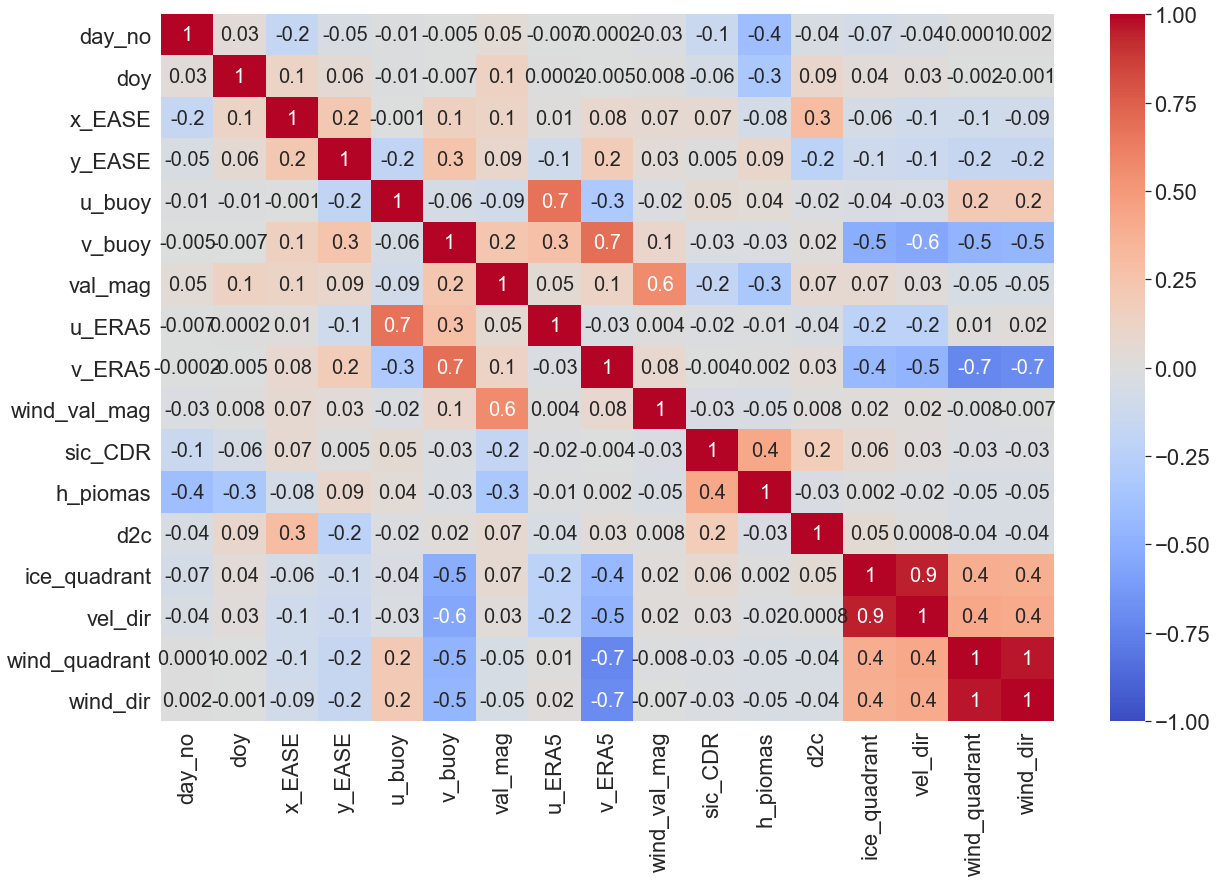

In [208]:
fig, ax = plt.subplots(figsize=(20,13))   
sns.set(font_scale=2)
sns.heatmap(var.corr(), ax=ax, annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',annot_kws={"size": 20})

In [210]:
var.to_excel('D:/modified_trainset.xlsx',index=False)

In [211]:
var2=var.drop(['u_buoy','v_buoy'],axis=1)

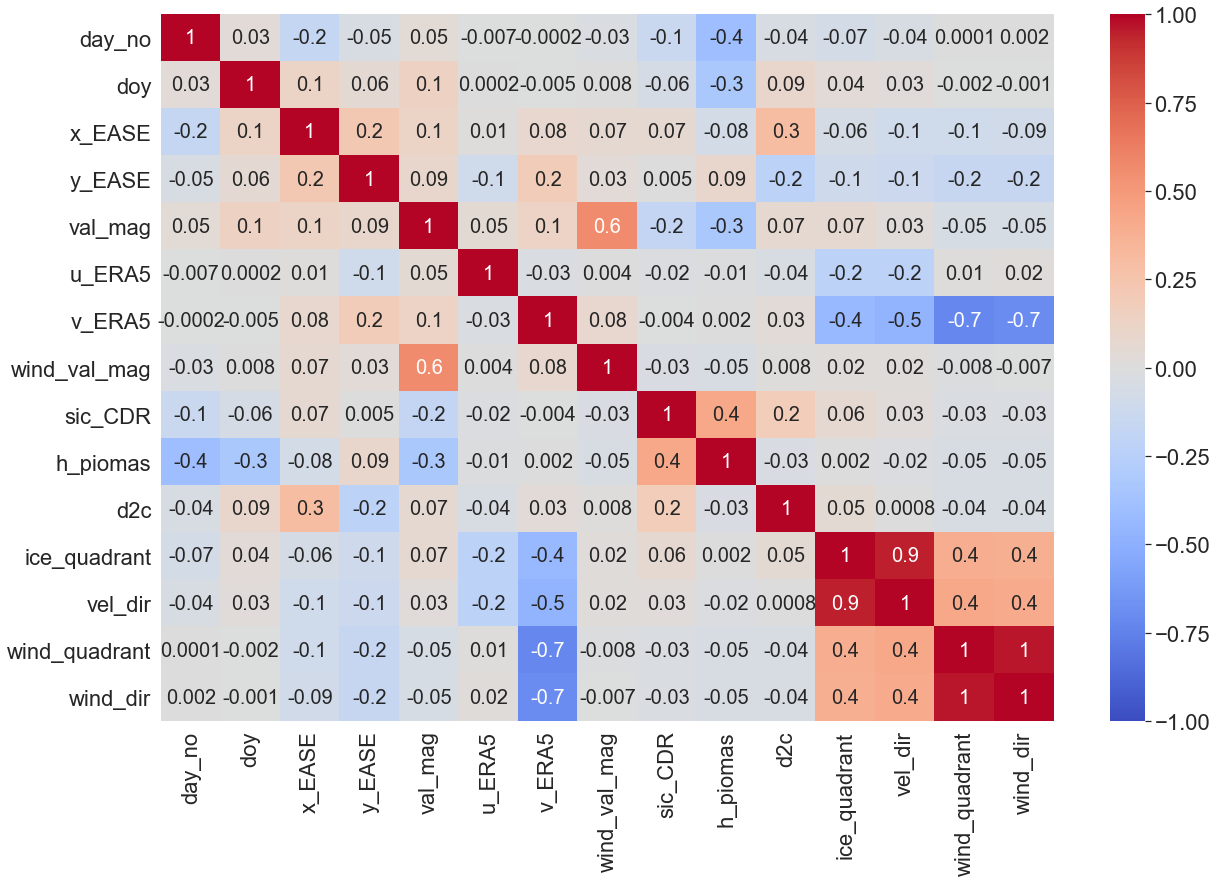

In [212]:
fig, ax = plt.subplots(figsize=(20,13))   
sns.set(font_scale=2)
sns.heatmap(var2.corr(), ax=ax, annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',annot_kws={"size": 20})

In [206]:
var[var['vel_dir']>var['wind_dir']].shape[0]

220854

In [207]:
var[var['vel_dir']<var['wind_dir']].shape[0]

118624